In [12]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

sys.path.append('..')

sys.path.append('C:/Users/richy/OneDrive/Bureau/prog/jupyternb/')
import fidle.pwk as pwk

In [3]:
data = pd.read_csv(f'C:/Users/richy/OneDrive/Bureau/prog/jupyternb/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("few lines of the datasets :"))
print('missing data : ', data.isna().sum().sum(), 'shape : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


missing data :  0 shape :  (506, 14)


In [4]:
data_train = data.sample(frac=0.7, axis=0)
data_test = data.drop(data_train.index)
 
x_train = data_train.drop('medv', axis=1)
y_train = data_train['medv']
x_test = data_test.drop('medv', axis=1)
y_test = data_test['medv']

print('original data shape', data.shape)
print('x_train', x_train.shape, 'y_train', y_train.shape)
print('x_test', x_test.shape, 'y_test', y_test.shape)

original data shape (506, 14)
x_train (354, 13) y_train (354,)
x_test (152, 13) y_test (152,)


In [5]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalisation"))

mean = x_train.mean()
std = x_train.std()
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalisation"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,4.12,10.89,11.44,0.07,0.56,6.28,70.25,3.67,9.79,415.27,18.52,355.21,12.92
std,9.81,22.99,6.97,0.26,0.11,0.75,28.07,2.09,8.78,170.59,2.21,92.71,7.35
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.17,1.00,188.00,12.60,0.32,1.73
25%,0.09,0.00,5.19,0.00,0.45,5.86,46.15,2.00,4.00,279.00,17.40,373.30,6.97
50%,0.30,0.00,9.90,0.00,0.54,6.19,80.55,2.90,5.00,345.00,19.10,391.60,11.57
75%,3.97,9.38,18.10,0.00,0.63,6.65,95.15,4.85,24.00,666.00,20.20,396.12,17.21
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,36.98


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.47,-1.57,-0.28,-1.50,-3.64,-2.40,-1.20,-1.00,-1.33,-2.68,-3.83,-1.52
25%,-0.41,-0.47,-0.90,-0.28,-0.92,-0.56,-0.86,-0.80,-0.66,-0.80,-0.51,0.20,-0.81
50%,-0.39,-0.47,-0.22,-0.28,-0.19,-0.12,0.37,-0.37,-0.55,-0.41,0.26,0.39,-0.18
75%,-0.01,-0.07,0.96,-0.28,0.62,0.49,0.89,0.57,1.62,1.47,0.76,0.44,0.58
max,8.65,3.88,2.34,3.55,2.75,3.35,1.06,3.37,1.62,1.73,1.58,0.45,3.27


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
215,-0.40,-0.47,-0.12,-0.28,-0.62,-0.13,-0.99,0.13,-0.66,-0.81,0.04,0.41,-0.47
462,0.26,-0.47,0.96,-0.28,1.36,0.05,0.45,-0.45,1.62,1.47,0.76,0.45,0.15
446,0.22,-0.47,0.96,-0.28,1.59,0.08,0.93,-0.77,1.62,1.47,0.76,-0.40,0.66
356,0.50,-0.47,0.96,3.55,1.86,-0.09,0.97,-0.74,1.62,1.47,0.76,0.24,0.64
176,-0.41,-0.47,-1.06,-0.28,-0.43,-0.35,-0.82,-0.05,-0.55,-0.70,-0.87,0.41,-0.38


In [19]:
def get_model_v1(shape):
    
    model = keras.models.Sequential()
    
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))   
    model.add(keras.layers.Dense(1, name='Output'))
              
    model.compile(optimizer='adam', loss='mse', metrics = ['mae', 'mse'])
    
    return model

In [1]:
model = get_model_v1((13,))

model.summary()

NameError: name 'get_model_v1' is not defined

In [2]:
history = model.fit(x_train, y_train, epochs = 60, batch_size = 10, verbose = 1, validation_data = (x_test, y_test))

NameError: name 'model' is not defined

In [3]:
score = model.evaluate(x_test, y_test, verbose=1)
score

NameError: name 'model' is not defined

In [23]:
df = pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,521.301208,20.669914,521.301208,391.520844,18.172598,391.520844
1,242.576004,12.698345,242.576004,59.238525,5.672690,59.238525
2,61.789684,5.746299,61.789684,37.703918,4.621316,37.703918
3,39.911186,4.589108,39.911186,29.766502,4.052657,29.766502
4,31.946857,4.018704,31.946857,26.593731,3.833853,26.593731
5,27.026022,3.724775,27.026022,24.563025,3.630929,24.563025
6,23.822803,3.481940,23.822803,23.861038,3.416367,23.861038
7,22.538221,3.306673,22.538221,22.323669,3.275072,22.323669
8,20.565821,3.143135,20.565821,21.239204,3.156405,21.239204
9,18.472004,2.945518,18.472004,20.794930,3.359087,20.794930


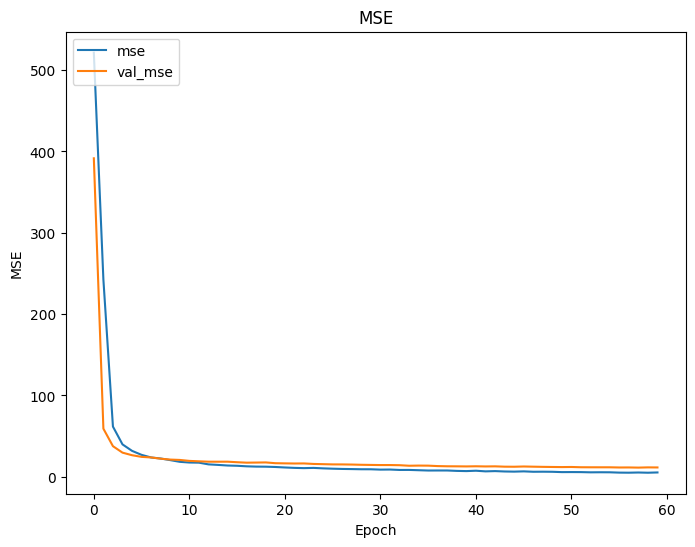

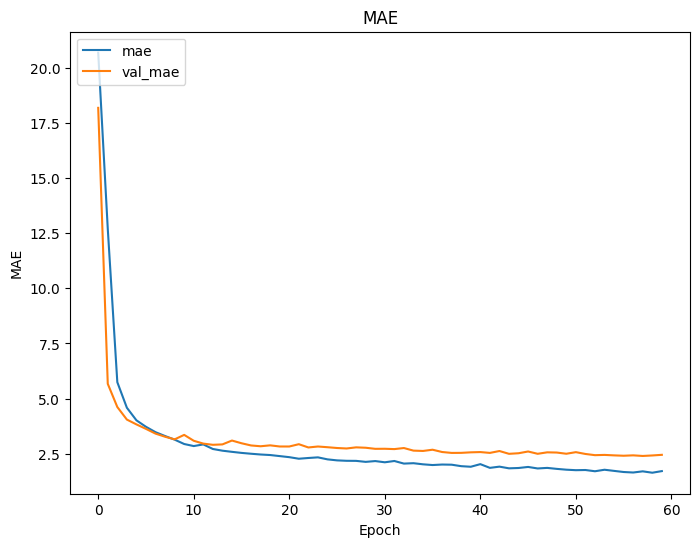

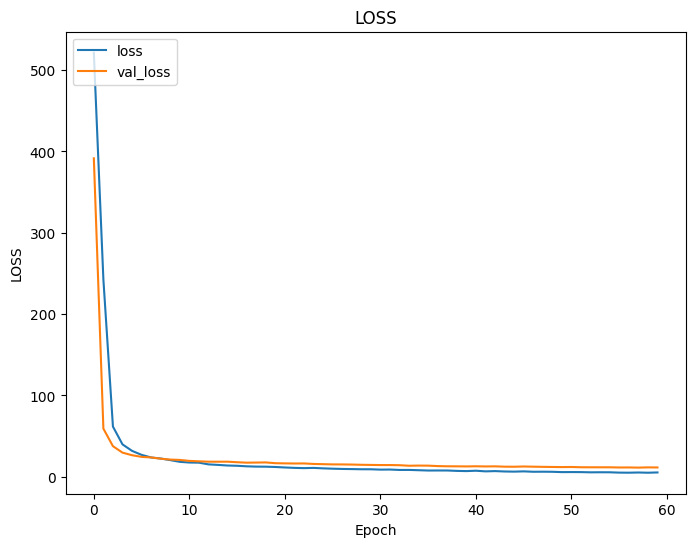

In [40]:
pwk.plot_history(history, plot={'MSE' :['mse', 'val_mse'], 'MAE' :['mae', 'val_mae'], 'LOSS':['loss', 'val_loss']})

In [38]:
my_data = [ 1.26425925, -0.48522739, 1.0436489, -0.23112788, 1.37120745, -2.14308942, 1.13489104, -1.06802005, 1.71189006, 1.57042287, 0.77859951, 0.14769795, 2.7585581 ]
my_data = np.array(my_data).reshape(1, 13)

In [39]:
prediction = model.predict(my_data)
print(prediction[0][0])

1/1 [==============================] - 0s 18ms/step
10.374891
